# Introduction to `SpatialData` objects

⚠️ Adjust the variable below to the data path on your specific workstation.

In [1]:
data_path = "../data/"

## Reading common raw data formats

The `spatialdata-io` library allows for reading common raw data formats. 
Here we show an example where 3 very different technologies from 10x Genomics are read into a general data structure, given by the [`SpatialData` class](https://spatialdata.scverse.org/en/latest/generated/spatialdata.SpatialData.html#spatialdata.SpatialData). From the presentation you might remember that these are the elements that can be contained inside of a `SpatialData` object:

<img src="../../../../misc/ressources/elements.png" alt="spatialdata design is modular" style="max-width: 800px;">


### Visium 

In [2]:
from spatialdata_io import visium, visium_hd, xenium

/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [3]:
sdata_visium = visium(data_path + "visium_2.1.0_2_io_subset")

INFO     reading                                                                                                   
         ../data/visium_2.1.0_2_io_subset/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_filtered_feature_bc_
         matrix.h5                                                                                                 


/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata/models/models.py:1053: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)


The warning above indicates that the variable names (in this case, genes) in the provided data are not unique. It is essential that the variable names are unique to ensure the accuracy of several analysis steps, so we'll use the `AnnData` API to make sure of that.

In [4]:
sdata_visium.tables["table"].var_names_make_unique()  # modifies in-place

Let's have a look at the `SpatialData` object we just created:

In [5]:
sdata_visium

SpatialData object
├── Images
│     ├── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image': DataArray[cyx] (3, 2000, 1744)
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image': DataArray[cyx] (3, 600, 523)
├── Shapes
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma': GeoDataFrame shape: (5756, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (5756, 18085)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'downscaled_lowres', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'global', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image (Im

### Visium HD

In [6]:
sdata_visium_hd = visium_hd("../data/visium_hd_3.0.0_io_subset")

sdata_visium_hd

/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/var/folders/qg/qgc908995g3fc8qtss2fsbhhxyxxj4/T/ipykernel_54847/2629054539.py:1: UserWarning: No full resolution image found. If incorrect, please specify the path in the `fullres_image_file` parameter when calling the `visium_hd` reader function.
  sdata_visium_hd = visium_hd("../data/visium_hd_3.0.0_io_subset")


SpatialData object
├── Images
│     ├── 'Visium_HD_Mouse_Small_Intestine_hires_image': DataArray[cyx] (3, 5575, 6000)
│     └── 'Visium_HD_Mouse_Small_Intestine_lowres_image': DataArray[cyx] (3, 558, 600)
├── Shapes
│     └── 'Visium_HD_Mouse_Small_Intestine_square_008um': GeoDataFrame shape: (351817, 1) (2D shapes)
└── Tables
      └── 'square_008um': AnnData (351817, 19059)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        Visium_HD_Mouse_Small_Intestine_hires_image (Images), Visium_HD_Mouse_Small_Intestine_square_008um (Shapes)
    ▸ 'downscaled_lowres', with elements:
        Visium_HD_Mouse_Small_Intestine_lowres_image (Images), Visium_HD_Mouse_Small_Intestine_square_008um (Shapes)
    ▸ 'global', with elements:
        Visium_HD_Mouse_Small_Intestine_hires_image (Images), Visium_HD_Mouse_Small_Intestine_lowres_image (Images), Visium_HD_Mouse_Small_Intestine_square_008um (Shapes)

In [7]:
sdata_visium_hd.tables["square_008um"].var_names_make_unique()  # modifies in-place

### Xenium

In [8]:
sdata_xenium = xenium("../data/xenium_2.0.0_io_subset", cells_as_circles=True)

sdata_xenium

INFO     reading ../data/xenium_2.0.0_io_subset/cell_feature_matrix.h5                                             


<TiffTag.fromfile> raised TiffFileError('<tifffile.TiffTag 270 @124> invalid value offset 414390846')


SpatialData object
├── Images
│     ├── 'he_image': DataTree[cyx] (3, 5636, 1448), (3, 2818, 724), (3, 1409, 362), (3, 704, 181), (3, 352, 90)
│     └── 'morphology_focus': DataTree[cyx] (1, 17098, 51187), (1, 8549, 25593), (1, 4274, 12796), (1, 2137, 6398), (1, 1068, 3199)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (17098, 51187), (8549, 25593), (4274, 12796), (2137, 6398), (1068, 3199)
│     └── 'nucleus_labels': DataTree[yx] (17098, 51187), (8549, 25593), (4274, 12796), (2137, 6398), (1068, 3199)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 11) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (162254, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (162254, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (156628, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (162254, 377)
with coordinate systems:
    ▸ 'global', with elements:
        he_image (Images), morphology_focus (Images), cell_labels

Representation of a multiscale image:

![image pyramid](../../../../misc/ressources/image_pyramid.png)

## Saving to the SpatialData Zarr format

We introduce a storage format that extends the [NGFF (Next Generation File Format) specification](https://www.nature.com/articles/s41592-021-01326-w). The NGFF specification is implemented in the [OME-Zarr](https://link.springer.com/article/10.1007/s00418-023-02209-1) disk format; the SpatialData Zarr format is an extension of OME-Zarr and will eventually converge to it.

Practically you can write the data as follows.

⚠️ Please uncomment the following cells with `write()` if this is the first time you run this notebook. They are commented because they make automated testing of the notebook easier (faster and no overwrite of files used by other notebooks).

In [9]:
sdata_visium.write(data_path + "visium.zarr", overwrite=True)

INFO     The Zarr backing store has been changed from None the new file path: ../data/visium.zarr                  


In [10]:
sdata_visium_hd.write(data_path + "visium_hd.zarr", overwrite=True)

INFO     The Zarr backing store has been changed from None the new file path: ../data/visium_hd.zarr               


In [11]:
sdata_xenium.write(data_path + "xenium.zarr", overwrite=True)

<TiffTag.fromfile> raised TiffFileError('<tifffile.TiffTag 270 @124> invalid value offset 414390846')


INFO     The Zarr backing store has been changed from None the new file path: ../data/xenium.zarr                  


## Loading `SpatialData` from a disk-backed .zarr

<div style="border: 1px solid #4CAF50; border-left-width: 15px; padding: 10px; background-color: #F0FFF0; color: black;">
    <strong>Tip:</strong>
    <p>Given a SpatialData .zarr file, you can print its text representation from a terminal with:<br><code>python -m spatialdata peek data.zarr</code>.</p>
</div>


Saving to .zarr and re-reading the data is generally recommended when the data is large, since our storage format is optimized for dealing with large collections of images, geometries and annotations. For instance, if you save the data to Zarr and need to access a portion of an iamge, you will be able to read that portion without having to read the whole image.

In [13]:
# spatialdata-io is not needed in case your data is already in the SpatialData Zarr format

import spatialdata as sd

sdata_visium = sd.read_zarr(data_path + "visium.zarr")
sdata_visium_hd = sd.read_zarr(data_path + "visium_hd.zarr")
sdata_xenium = sd.read_zarr(data_path + "xenium.zarr")


/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


## Exploring the core slots of a `SpatialData` object

A `SpatialData` object is a container for images, labels, shapes, points and tables. Each of this object is denoted with the term *element*. We will use this term often.

For instance, we will use the term "Shapes element" to denote a geometric object (as we will see below, a dataframe) containing all the cells for a sample. We will **not** use the term "shapes element" to denote a single cell (a single cell will be a single row in our geometric dataframe).

The `spatialdata` library does not introduce specific types for storing the elements, and rather adopts standard classes from the imaging and geospatial Python community. 

We use the following classes for storing the elements:
- single-scale images and labels elements are represented as [`xarray.DataArray`](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html) objects.
- multi-scale images and labels elements are represented as [`datatree.DataTree`](https://xarray-datatree.readthedocs.io/en/latest/quick-overview.html#datatrees) objects.
- shapes elements are represented as [`geopandas.GeoDataFrame`](https://geopandas.org/en/stable/docs/user_guide/data_structures.html) objects.
- points elements are represented as a lazy version of a [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) object; i.e. as [`dask.DataFrame`](https://docs.dask.org/en/stable/dataframe.html) objects.
- tables elements are represented as [`anndata.AnnData`](https://anndata.readthedocs.io/en/latest/) objects.

In particular:
- 2D/3D (cyx/czyx) multi-channel single-scale/multi-scale *images* (e.g. large H&E images)
- 2D/3D (yx/zyx) single-scale/multi-scale *labels* (e.g. segmentation masks)
- 2D/3D (xy/xyz) *points* (e.g. transcripts locations with gene id information)
- 2D (xy) *shapes* (e.g. cell/nucleus boundaries, anatomical annotatoins)
- *tables* (sparse/dense matrices/dataframes annotating the data).

We will give a quick overview of these classes here below; please refer to the respective documentations for a deeper introduction.

In the following examples *we will not manipulate or plot the elements using `spatialdata` code; we will just use standard `geospatial` libraries. This is to exemplify and remark how the data types we use are interoperable. Later we will show how `spatialdata` adds a layer of convenience on top of the existing geospatial ecosystem, by providing APIs that are implemented under the hood for all the geometric types.

### Images and Labels (`xarray.DataArray`)

In [14]:
image = sdata_visium.images["CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image"]
image

<xarray.DataArray 'image' (c: 3, y: 2000, x: 1744)> Size: 10MB
dask.array<from-zarr, shape=(3, 2000, 1744), dtype=uint8, chunksize=(3, 2000, 1744), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U1 12B 'r' 'g' 'b'
  * y        (y) float64 16kB 0.5 1.5 2.5 3.5 ... 1.998e+03 1.998e+03 2e+03
  * x        (x) float64 14kB 0.5 1.5 2.5 3.5 ... 1.742e+03 1.742e+03 1.744e+03
Attributes:
    transform:  {'downscaled_hires': Identity , 'global': Scale (c, y, x)\n  ...

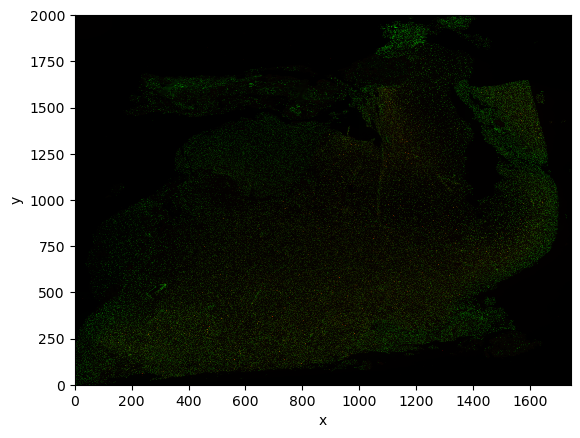

In [35]:
image.plot.imshow()

As you can see, the object is a regular [`xarray.DataArray`](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html) object, a standard data structure in geospatial analysis. Therefore you can operate on the object with standard APIs or common external libraries (such as [`xarray-spatial`](https://github.com/makepath/xarray-spatial_).

For example:

In [27]:
import numpy as np

log_image = np.log1p(image).astype(np.float32)

In [19]:
log_image

<xarray.DataArray 'image' (c: 3, y: 2000, x: 1744)> Size: 42MB
dask.array<astype, shape=(3, 2000, 1744), dtype=float32, chunksize=(3, 2000, 1744), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U1 12B 'r' 'g' 'b'
  * y        (y) float64 16kB 0.5 1.5 2.5 3.5 ... 1.998e+03 1.998e+03 2e+03
  * x        (x) float64 14kB 0.5 1.5 2.5 3.5 ... 1.742e+03 1.742e+03 1.744e+03
Attributes:
    transform:  {'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_downsc...

As said, the image is a regular `xarray.DataArray` object, so we can for instance plot it using standard APIs.

### The `datatree.DataTree` class (multiscale *images* and *labels*)

Multiscale images and labels are represented using the [`datatree.DataTree` class](https://xarray-datatree.readthedocs.io/en/latest/quick-overview.html#datatrees).

We will use the Xenium dataset since the MERFISH ones does not contain any multiscale image.

In [31]:
sdata_xenium

SpatialData object
├── Images
│     ├── 'he_image': DataTree[cyx] (3, 5636, 1448), (3, 2818, 724), (3, 1409, 362), (3, 704, 181), (3, 352, 90)
│     └── 'morphology_focus': DataTree[cyx] (1, 17098, 51187), (1, 8549, 25593), (1, 4274, 12796), (1, 2137, 6398), (1, 1068, 3199)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (17098, 51187), (8549, 25593), (4274, 12796), (2137, 6398), (1068, 3199)
│     └── 'nucleus_labels': DataTree[yx] (17098, 51187), (8549, 25593), (4274, 12796), (2137, 6398), (1068, 3199)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 11) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (162254, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (162254, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (156628, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (162254, 377)
with coordinate systems:
    ▸ 'global', with elements:
        he_image (Images), morphology_focus (Images), cell_labels

Let's load a labels object instead of an image. Images always have a channel `c`, labels never. What we will discuss for labels applies exaclty to images.

In [32]:
multiscale_labels = sdata_xenium["cell_labels"]
multiscale_labels

<xarray.DataTree>
Group: /
├── Group: /scale0
│       Dimensions:  (y: 17098, x: 51187)
│       Coordinates:
│         * y        (y) float64 137kB 0.5 1.5 2.5 3.5 ... 1.71e+04 1.71e+04 1.71e+04
│         * x        (x) float64 409kB 0.5 1.5 2.5 3.5 ... 5.118e+04 5.119e+04 5.119e+04
│       Data variables:
│           image    (y, x) uint32 4GB dask.array<chunksize=(4096, 4096), meta=np.ndarray>
├── Group: /scale1
│       Dimensions:  (y: 8549, x: 25593)
│       Coordinates:
│         * y        (y) float64 68kB 1.0 3.0 5.0 7.0 ... 1.709e+04 1.71e+04 1.71e+04
│         * x        (x) float64 205kB 1.0 3.0 5.0 7.0 ... 5.118e+04 5.118e+04 5.119e+04
│       Data variables:
│           image    (y, x) uint32 875MB dask.array<chunksize=(4096, 4096), meta=np.ndarray>
├── Group: /scale2
│       Dimensions:  (y: 4274, x: 12796)
│       Coordinates:
│         * y        (y) float64 34kB 2.0 6.001 10.0 ... 1.709e+04 1.709e+04 1.71e+04
│         * x        (x) float64 102kB 2.0 6.0 10.0 ... 5.118e+04 5.118e+04 5.118e+04
│       Data variables:
│           image    (y, x) uint32 219MB dask.array<chunksize=(4096, 4096), meta=np.ndarray>
├── Group: /scale3
│       Dimensions:  (y: 2137, x: 6398)
│       Coordinates:
│         * y        (y) float64 17kB 4.0 12.0 20.0 ... 1.708e+04 1.709e+04 1.709e+04
│         * x        (x) float64 51kB 4.0 12.0 20.0 ... 5.117e+04 5.117e+04 5.118e+04
│       Data variables:
│           image    (y, x) uint32 55MB dask.array<chunksize=(2137, 4096), meta=np.ndarray>
└── Group: /scale4
        Dimensions:  (y: 1068, x: 3199)
        Coordinates:
          * y        (y) float64 9kB 8.005 24.01 40.02 ... 1.706e+04 1.707e+04 1.709e+04
          * x        (x) float64 26kB 8.0 24.0 40.0 ... 5.115e+04 5.116e+04 5.118e+04
        Data variables:
            image    (y, x) uint32 14MB dask.array<chunksize=(1068, 3199), meta=np.ndarray>

The data tree has 5 groups, one for each scale of the multiscale labels. Each scale is a leaf of the tree (i.e. the tree doesn't branch out again), also each scale could in principle contain multiple labels elements, but `spatialdata` requires for it to contain a single labels element. Let's show an example on how to access the various scales and how to manipulate the object.

In [25]:
# show the scales
list(multiscale_labels.keys())

['scale0', 'scale1', 'scale2', 'scale3', 'scale4']

In [33]:
# access the scale 1
multiscale_labels["scale1"]

<xarray.DataTree 'scale1'>
Group: /scale1
    Dimensions:  (y: 8549, x: 25593)
    Coordinates:
      * y        (y) float64 68kB 1.0 3.0 5.0 7.0 ... 1.709e+04 1.71e+04 1.71e+04
      * x        (x) float64 205kB 1.0 3.0 5.0 7.0 ... 5.118e+04 5.118e+04 5.119e+04
    Data variables:
        image    (y, x) uint32 875MB dask.array<chunksize=(4096, 4096), meta=np.ndarray>

In [34]:
# this group contains a single-labels (as expected), called 'image'
# let's access such object
multiscale_labels["scale1"]["image"]

<xarray.DataArray 'image' (y: 8549, x: 25593)> Size: 875MB
dask.array<xarray-<this-array>, shape=(8549, 25593), dtype=uint32, chunksize=(4096, 4096), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 68kB 1.0 3.0 5.0 7.0 ... 1.709e+04 1.71e+04 1.71e+04
  * x        (x) float64 205kB 1.0 3.0 5.0 7.0 ... 5.118e+04 5.118e+04 5.119e+04
Attributes:
    transform:  {'global': Sequence \n    Scale (y, x)\n        [2.         2...

Note how the labels is a `xarray.DataArray` object. So, as expected, a multiscale labels is a collection of single scale labels.

Note also how the labels dimension are `('y', 'x')`; as said labels do no contain the channel dimension.

Now here is an example of using the data tree APIs, to slice in one go all the labels in the data tree.

In [28]:
multiscale_labels.sel(x=slice(30, 100))

DataTree('None', parent=None)
├── DataTree('scale0')
│       Dimensions:  (y: 17098, x: 70)
│       Coordinates:
│         * y        (y) float64 0.5 1.5 2.5 3.5 ... 1.71e+04 1.71e+04 1.71e+04
│         * x        (x) float64 30.5 31.5 32.5 33.5 34.5 ... 95.5 96.5 97.5 98.5 99.5
│       Data variables:
│           image    (y, x) uint32 dask.array<chunksize=(4096, 70), meta=np.ndarray>
├── DataTree('scale1')
│       Dimensions:  (y: 8549, x: 35)
│       Coordinates:
│         * y        (y) float64 1.0 3.0 5.0 7.0 ... 1.709e+04 1.71e+04 1.71e+04
│         * x        (x) float64 31.0 33.0 35.0 37.0 39.0 ... 91.0 93.0 95.0 97.0 99.0
│       Data variables:
│           image    (y, x) uint32 dask.array<chunksize=(4096, 35), meta=np.ndarray>
├── DataTree('scale2')
│       Dimensions:  (y: 4274, x: 18)
│       Coordinates:
│         * y        (y) float64 2.0 6.001 10.0 14.0 ... 1.709e+04 1.709e+04 1.71e+04
│         * x        (x) float64 30.0 34.0 38.0 42.0 46.0 ... 86.01 90.01 94.01 98.01
│       Data variables:
│           image    (y, x) uint32 dask.array<chunksize=(4096, 18), meta=np.ndarray>
├── DataTree('scale3')
│       Dimensions:  (y: 2137, x: 8)
│       Coordinates:
│         * y        (y) float64 4.0 12.0 20.0 28.0 ... 1.708e+04 1.709e+04 1.709e+04
│         * x        (x) float64 36.0 44.0 52.0 60.0 68.0 76.0 84.0 92.01
│       Data variables:
│           image    (y, x) uint32 dask.array<chunksize=(2137, 8), meta=np.ndarray>
└── DataTree('scale4')
        Dimensions:  (y: 1068, x: 4)
        Coordinates:
          * y        (y) float64 8.005 24.01 40.02 ... 1.706e+04 1.707e+04 1.709e+04
          * x        (x) float64 40.0 56.0 72.0 88.01
        Data variables:
            image    (y, x) uint32 dask.array<chunksize=(1068, 4), meta=np.ndarray>

Finally, let's make a plot of a portion of a portion of the labels.

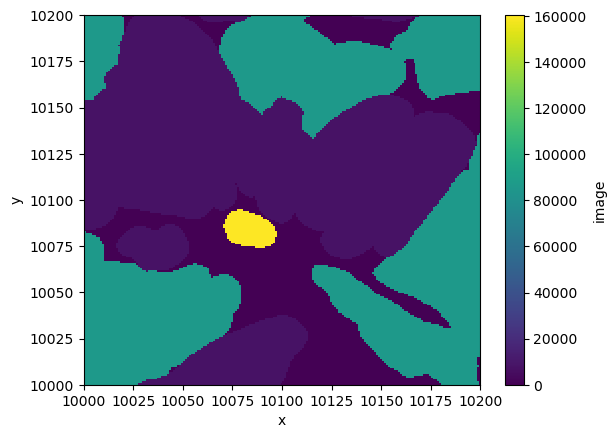

In [36]:
multiscale_labels["scale0"]["image"].sel(
    x=slice(10000, 10200), y=slice(10000, 10200)
).plot.imshow()

### Shapes (`geopandas.GeoDataFrame`)
A [`GeoDataFrame`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html) is an object that inherits from a `pandas.DataFrame`, and as such it supports the APIs that `pandas` provides, but also new powerful APIs for geometric manipulation.

In [30]:
gdf = sdata_xenium["cell_boundaries"]
gdf

,geometry
aaaadpbp-1,"POLYGON ((205.062 1489.838, 204.213 1490.475, ..."
aaaaficg-1,"POLYGON ((200.812 1811.988, 199.538 1812.625, ..."
aaabbaka-1,"POLYGON ((177.013 2158.575, 175.525 2159.425, ..."
aaabbjoo-1,"POLYGON ((185.513 2156.238, 184.238 2157.3, 18..."
aaablchg-1,"POLYGON ((197.2 2191.938, 197.413 2192.15, 197..."
...,...
ojaaphhh-1,"POLYGON ((4551.538 1640.925, 4551.325 1641.138..."
ojabeldf-1,"POLYGON ((4437.212 1627.75, 4437 1627.963, 443..."
ojacfbid-1,"POLYGON ((4462.712 1575.05, 4462.288 1575.475,..."
ojacfhhg-1,"POLYGON ((4619.962 1452.863, 4619.75 1453.075,..."


The `geometry` column is what contains the spatial information.

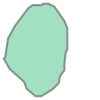

In [31]:
gdf.geometry.iloc[3]

In `spatialdata`, we support only dataframes where all the geometries are polygons/multipolygons, either where all the geometries are `shapely.Point` and a column called `radius` is present.

One can add new regular columns to the dataframe.

In [32]:
gdf["cell_area"] = gdf.area
gdf

,geometry,cell_area
aaaadpbp-1,"POLYGON ((205.062 1489.838, 204.213 1490.475, ...",65.273241
aaaaficg-1,"POLYGON ((200.812 1811.988, 199.538 1812.625, ...",47.436672
aaabbaka-1,"POLYGON ((177.013 2158.575, 175.525 2159.425, ...",115.961463
aaabbjoo-1,"POLYGON ((185.513 2156.238, 184.238 2157.3, 18...",90.922142
aaablchg-1,"POLYGON ((197.2 2191.938, 197.413 2192.15, 197...",116.932837
...,...,...
ojaaphhh-1,"POLYGON ((4551.538 1640.925, 4551.325 1641.138...",25.084211
ojabeldf-1,"POLYGON ((4437.212 1627.75, 4437 1627.963, 443...",4.628853
ojacfbid-1,"POLYGON ((4462.712 1575.05, 4462.288 1575.475,...",5.621909
ojacfhhg-1,"POLYGON ((4619.962 1452.863, 4619.75 1453.075,...",6.141260


## Points(`dask.DataFrame`)
The [`dask.DataFrame` class](https://docs.dask.org/en/stable/dataframe.html) is a subclass of `pandas.DataFrame` that allows for lazy loading and lazy, distributed computation using Dask. This is used because generally points collections of spatial transcriptomics datasets are too big to be handled with regular `pandas.DataFrame` objects.

When you perform operations on a `dask.DataFrame`, they are not computed until you choose to do so.

In [37]:
ddf = sdata_xenium["transcripts"]
ddf

,x,y,z,feature_name,cell_id,transcript_id,fov_name,codeword_index,overlaps_nucleus,nucleus_distance,qv
npartitions=4,,,,,,,,,,,
,float32,float32,float32,category[unknown],string,uint64,string,int32,uint8,float32,float32
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...


In [38]:
subset = ddf[ddf.feature_name == "CXCR4"][["feature_name", "cell_id"]]
subset

,feature_name,cell_id
npartitions=4,,
,category[unknown],string
,...,...
,...,...
,...,...
,...,...


Let's now perform the operations by calling `.compute()`.

In [39]:
df = subset.compute()
df

,feature_name,cell_id
2,CXCR4,UNASSIGNED
3,CXCR4,UNASSIGNED
213,CXCR4,UNASSIGNED
214,CXCR4,UNASSIGNED
272,CXCR4,UNASSIGNED
...,...,...
163229,CXCR4,UNASSIGNED
163244,CXCR4,jgdldkap-1
163270,CXCR4,jgebeofm-1
163279,CXCR4,jgcgjopd-1


As you can see, `df` is a regular `pandas.DataFrame`:

In [40]:
type(df)

pandas.core.frame.DataFrame

### Tables(`anndata.AnnData`)
<img src="https://raw.githubusercontent.com/scverse/anndata/main/docs/_static/img/anndata_schema.svg" width="500" height="500">

Finally we use [`AnnData` objects](https://anndata.readthedocs.io/en/latest/) to store annotations. We introduced the jargon *tables* to denotes these objects; please keep in mind that `AnnData` objects allow for storing dataframes and sparse/dense tensors.

In [41]:
adata = sdata_xenium["table"]
adata

AnnData object with n_obs × n_vars = 162254 × 377
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'z_level', 'nucleus_count', 'cell_labels'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

Let's see some examples. A gene expression matrix can be stored the `.X` slot.

In [42]:
adata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 4900367 stored elements and shape (162254, 377)>

In [43]:
adata.to_df()

,ABCC11,ACE2,ACKR1,ACTA2,ACTG2,ADAM28,ADAMTS1,ADGRE1,ADGRL4,ADH1C,...,TRAC,TREM2,TSPAN19,UBE2C,UMOD,UPK3B,VCAN,VSIG4,VWA5A,VWF
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Information on the genes (=variables), is stored in the `.var` slot.

In [44]:
adata.var

,gene_ids,feature_types,genome
ABCC11,ENSG00000121270,Gene Expression,Unknown
ACE2,ENSG00000130234,Gene Expression,Unknown
ACKR1,ENSG00000213088,Gene Expression,Unknown
ACTA2,ENSG00000107796,Gene Expression,Unknown
ACTG2,ENSG00000163017,Gene Expression,Unknown
...,...,...,...
UPK3B,ENSG00000243566,Gene Expression,Unknown
VCAN,ENSG00000038427,Gene Expression,Unknown
VSIG4,ENSG00000155659,Gene Expression,Unknown
VWA5A,ENSG00000110002,Gene Expression,Unknown


Information on the cells (=observations), is stored in the `.obs` slot.

In [45]:
adata.obs

,cell_id,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,region,z_level,nucleus_count,cell_labels
0,aaaadpbp-1,0,0,0,0,0,0,68.456877,NaN,cell_circles,0.0,0.0,1
1,aaaaficg-1,19,0,0,0,0,19,49.130002,21.268595,cell_circles,0.0,1.0,2
2,aaabbaka-1,53,0,0,0,0,53,119.618911,74.778753,cell_circles,0.0,1.0,3
3,aaabbjoo-1,29,0,0,0,0,29,94.241097,59.109533,cell_circles,0.0,1.0,4
4,aaablchg-1,42,0,0,1,0,43,120.341411,52.426408,cell_circles,0.0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162249,ojaaphhh-1,3,0,0,0,0,3,26.913126,11.153594,cell_circles,5.0,1.0,162250
162250,ojabeldf-1,6,0,0,0,0,6,5.418750,5.418750,cell_circles,7.0,1.0,162251
162251,ojacfbid-1,0,0,0,0,0,0,6.502500,6.502500,cell_circles,5.0,1.0,162252
162252,ojacfhhg-1,2,0,0,0,0,2,7.089532,7.089532,cell_circles,5.0,1.0,162253


The slot `.uns` can contain unstructured data. In particular it contains some metadata that is used to link tables to the spatial elements (e.g. cell segmentation masks) that they annotate.

In [46]:
adata.uns

{'spatialdata_attrs': {'instance_key': 'cell_id',
  'region': 'cell_circles',
  'region_key': 'region'}}

In [15]:
image = sdata_visium.images[
    "CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image"
]
print(image.data)
image.data

dask.array<from-zarr, shape=(3, 2000, 1744), dtype=uint8, chunksize=(3, 2000, 1744), chunktype=numpy.ndarray>


dask.array<from-zarr, shape=(3, 2000, 1744), dtype=uint8, chunksize=(3, 2000, 1744), chunktype=numpy.ndarray>

As you can see, `xarray` is using `dask` internally. You can compute the data as follows:

In [48]:
# produces an xarray object that is fully-loaded in memory
image.compute()

<xarray.DataArray 'image' (c: 1, y: 522, x: 575)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)
Coordinates:
  * c        (c) int64 0
  * y        (y) float64 0.5 1.5 2.5 3.5 4.5 ... 517.5 518.5 519.5 520.5 521.5
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 570.5 571.5 572.5 573.5 574.5
Attributes:
    transform:  {'global': Sequence \n    Scale (c, y, x)\n        [1.       ...

In [49]:
# accesses the data inside xarray, as a numpy array object
x = image.compute().data
print(type(x))
x

<class 'numpy.ndarray'>


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

## Futher reading
As mentioned before, we invite the readers to become familiar with the geospatial Python data structures that we use in the `spatialdata` library.
In the next tutorials we will explore various functions enabled by the `spatialdata` framework; anyway for a deeper introduction we kindly point you to the [notebooks section](https://spatialdata.scverse.org/en/latest/tutorials/notebooks/notebooks.html) of the documentation, and in particular to the following notebooks, which explain in detail how to create `SpatialData` objects from screatch and manipulate them:

- [In depth introduction to `SpatialData` objects](https://spatialdata.scverse.org/en/latest/tutorials/notebooks/notebooks/examples/models1.html).
- [In depth introduction to spatial elements and models (`.parse()`, `.validate()`)](https://spatialdata.scverse.org/en/latest/tutorials/notebooks/notebooks/examples/models2.html).
- [Annotating elements and manipulating annotations](https://spatialdata.scverse.org/en/latest/tutorials/notebooks/notebooks/examples/tables.html).

Furthermore, you can find curated code examples by checking the various [readers available in the `spatialdata-io` library](https://github.com/scverse/spatialdata-io/tree/main/src/spatialdata_io/readers).

Finally, for a deeper description of all the available functions, please consult the [API documentation](https://spatialdata.scverse.org/en/latest/api.html).